Implementasi logistic regression dengan python

In [50]:
#1. import package, function dan class
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
#2. mendapatkan dan menyediakan data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [30]:
#melihat tampilan x dan y baru
print(x, y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] [0 0 0 0 1 1 1 1 1 1]


In [31]:
#3. membuat dan menentukan model
model = LogisticRegression(solver='liblinear', random_state=0)

In [32]:
#melatih model
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [33]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

In [34]:
#mendapatkan atribut model
model.classes_

array([0, 1])

In [35]:
#mendapatkan nilai slope b1 dan titik intercept b0
print(model.intercept_, model.coef_)

[-1.04608067] [[0.51491375]]


In [36]:
#4. mengevaluasi model
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [37]:
#mendapatkan prediksi aktual
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [38]:
model.score(x, y)

0.9

In [39]:
#membuat confusion matrix dan memberikan actual serta predicted output
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

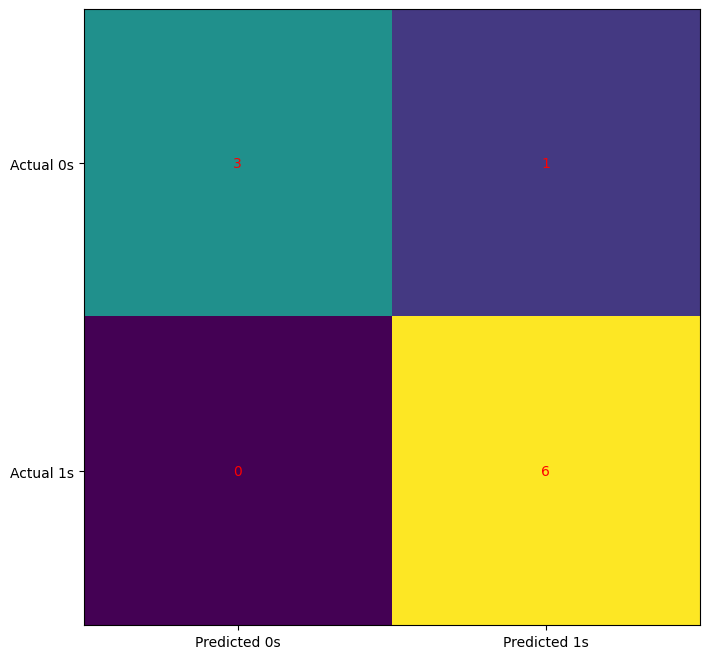

In [40]:
#menvisualisasikan confusion matrix
cm = confusion_matrix(y, model.predict(x))

fig, ax =  plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [41]:
#mendapatkan laporan mengenai klasifikasi 
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [42]:
#meningkatkan atau men-improve model
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [43]:
LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [44]:
print(model.intercept_, model.coef_)

[-3.51335372] [[1.12066084]]


In [45]:
print(model.predict_proba(x))

[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]


In [46]:
print(model.predict(x))

[0 0 0 0 1 1 1 1 1 1]


In [47]:
#mendapatkan prediksi
model.score(x, y)

1.0

In [48]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [49]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



Menggunakan logistic regression untuk memecahkan real-world classification problem

In [52]:
#1. import packages
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [57]:
#2. mendapatkan data
x, y = load_digits(return_X_y=True)

In [58]:
print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [59]:
#membagi set data (split data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
random_state=0)

In [60]:
#2b. men-standardize input dengan membuat instance dan memanggilnya
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [61]:
#3. membuat dan menggunakan model
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [63]:
LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [64]:
#4. mengevaluasi model
x_test = scaler.transform(x_test)

In [65]:
y_pred = model.predict(x_test)

In [66]:
model.score(x_train, y_train)

0.964509394572025

In [67]:
model.score(x_test, y_test)

0.9416666666666667

In [68]:
#mendapatkan confusion matrix
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]], dtype=int64)

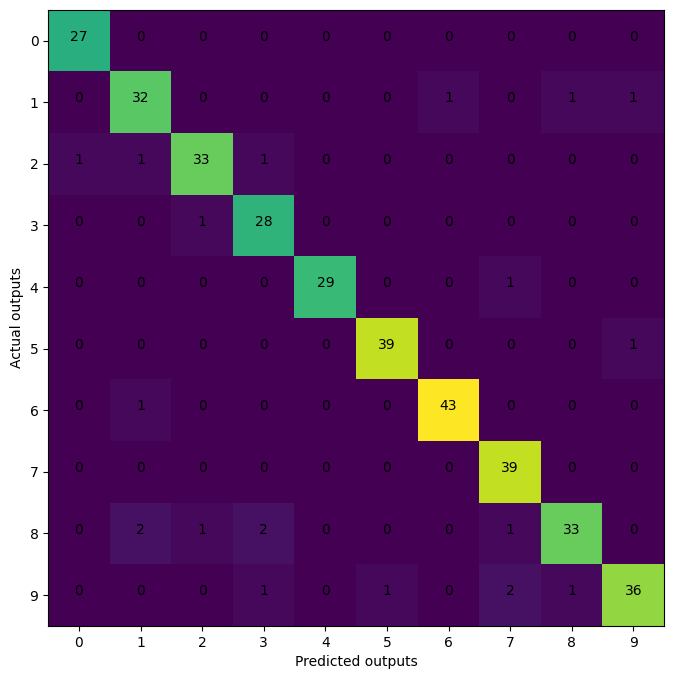

In [69]:
#menvisualisasikan
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center')
plt.show()

In [70]:
#mendapatkan laporan klasifikasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



KKN di python dengan scikit-learn

In [92]:
#1. membuat dataset 
#fitur pertama
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']

#fitur kedua
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

#target variabel
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [93]:
#encoding data kolom
#import labelEncoder
from sklearn import preprocessing

#membuat labelEncoder
le = preprocessing.LabelEncoder()

#men-convert string label pada number
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [94]:
#menyandikan temperature dan label ke dalam kolom numerik
#men-convert string label pada number
temp_encoded=le.fit_transform(temp)

label=le.fit_transform(play)
print(temp_encoded)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [95]:
#menggabungkan kolom menjadi satu set data
#menggabungkan weather dan temp ke dalam single listof tuples
features=list(zip(weather_encoded,temp_encoded))

print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [96]:
#membangun classifier model KKN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

#melatih model dengan train set
model.fit(features,label)

#prediksi pada test set
predicted = model.predict([[0,2]])

print(predicted)

[1]


KNN dengan multiple labels (banyak kelas)

In [97]:
#menimport library scikit-learn dataset
from sklearn import datasets

#mengambil dataset
wine = datasets.load_wine()

In [98]:
#memeriksa fitur dan nama target
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [100]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [101]:
#memeriksa 5 record teratas
print(wine.data[0:5])


[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [102]:
#memeriksa record set target
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [103]:
#memisahkan data
#menimport function
from sklearn.model_selection import train_test_split

#memisahkan dataset ke pelatihan set dan melakukan test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [104]:
#membuat model klasifikasi KNN untuk k = 5
#import knn Classifier model
from sklearn.neighbors import KNeighborsClassifier

#membuat KNN Classifier 
knn = KNeighborsClassifier(n_neighbors=5)

#melatih model dengan training set
knn.fit(X_train, y_train)

#prediksi respon untuk test dataset
y_pred = knn.predict(X_test)

In [106]:
#menghitung tingkat akuran pengkasifikasian
#import scikit-learn
from sklearn import metrics

#memperkirakan seberapa akuratnya
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
#dapat dilihat tingkat klasifikasi 66.66%

Accuracy: 0.6666666666666666


In [107]:
#membuat model klasifikasi KNN untuk k = 7
#import knn Classifier model
from sklearn.neighbors import KNeighborsClassifier

#membuat KNN Classifier 
knn = KNeighborsClassifier(n_neighbors=7)

#melatih model dengan training set
knn.fit(X_train, y_train)

#prediksi respon untuk test dataset
y_pred = knn.predict(X_test)

In [109]:
#menghitung tingkat akuran pengkasifikasian
#import scikit-learn
from sklearn import metrics

#memperkirakan seberapa akuratnya
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
#dapat dilihat tingkat klasifikasi 70%

Accuracy: 0.7037037037037037


In [110]:
#mengimpove model dan mencari tahu nilai k yang optimal
error = []

#menghitung error untuk nilai k antara 1 dan 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error mean')

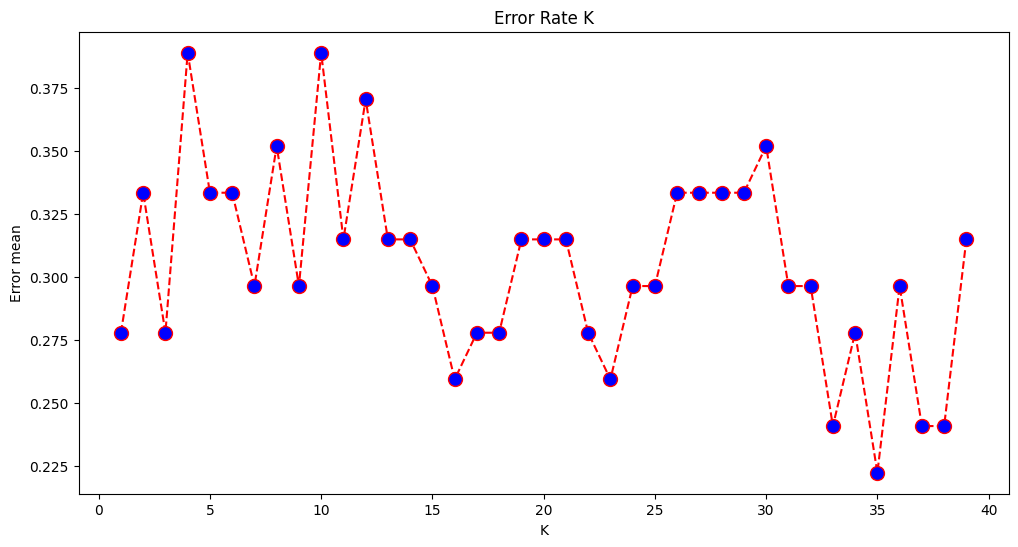

In [112]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

In [114]:
#berdasarkan plot diatas error terkecil yang didapatkan adalah 0,21 pada K = 25
#import knn Classifier model
from sklearn.neighbors import KNeighborsClassifier

#membuat KNN Classifier 
knn = KNeighborsClassifier(n_neighbors=25)

#melatih model dengan training set
knn.fit(X_train, y_train)

#prediksi respon untuk test dataset
y_pred = knn.predict(X_test)

#import scikit-learn modul untuk menghitung akurasi
from sklearn import metrics

#memperkirakan seberapa akurasinya
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7037037037037037
